# Case Study on ANOVA

XYZ Company has offices in four different zones. The company wishes to
investigate the following :
1. The mean sales generated by each zone.
2. Total sales generated by all the zones for each month.
3. Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.

In [2]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the csv file into a pandas dataframe.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sales_data_zone_wise.csv')
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [15]:
df.isna().sum()

Month          0
Zone - A       0
Zone - B       0
Zone - C       0
Zone - D       0
Total Sales    0
dtype: int64

As you can see that there is no null values present in the dataset. we can go for further procesing

### 1. The mean sales generated by each zone.

In [7]:
data = df.describe().T.round(3)
data

,count,mean,std,min,25%,50%,75%,max
Zone - A,29.0,1540493.138,261940.062,1128185.0,1305972.0,1534390.0,1820196.0,2004480.0
Zone - B,29.0,1755559.586,168389.886,1527574.0,1606010.0,1740365.0,1875658.0,2091194.0
Zone - C,29.0,1772871.034,333193.725,1237722.0,1523308.0,1767047.0,2098463.0,2290580.0
Zone - D,29.0,1842926.759,375016.479,1234311.0,1520406.0,1854412.0,2180416.0,2364132.0


Zone - A    1540493.138
Zone - B    1755559.586
Zone - C    1772871.034
Zone - D    1842926.759
Name: mean, dtype: float64

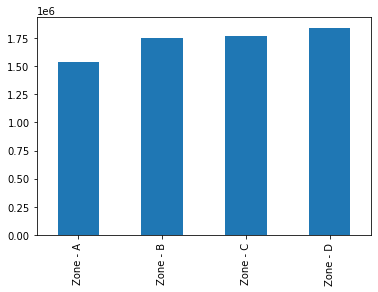

In [8]:
data['mean'].plot(kind = 'bar')
data['mean']

As you can see the mean sales of the 4 zones. It can be observed that Zone-D has the higest sales figures followed by Zone-C followed by Zone-B and at last position is Zone-A and Zone A having least mean sales. 

### 2. Total sales generated by all the zones for each month.

In [9]:
#Total sales generated by Zones in each month
df['Total Sales'] = df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].sum(axis=1) 
# or we can use Mean df.mean(numeric_only=True).apply("{0:}".format)
df[['Month','Total Sales']]

,Month,Total Sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


In [12]:
df[df['Total Sales']==np.max(df['Total Sales'])]

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Sales
3,Month - 4,1871571,1759617,2290580,2252681,8174449


In [13]:
df[df['Total Sales']==np.min(df['Total Sales'])]

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Sales
12,Month - 13,1254939,1588473,1348629,1733383,5925424


As you can see that maximum sales happened in the month 4 and minimum sales in month 13.

### 3. Check whether all the zones generate the same amount of sales.

From the data, we want to check one factor sales over 4 different groups(Zones) then we will use one way ANOVA

- H0 = All Zones generate the same amount of sales
- H1 = All zones generate Sales of atleast one Zone differs

In [10]:
from scipy.stats import f_oneway
stat, pvalue = f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
print('Stats = ',stat)
print('P-Value = ',pvalue)

Stats =  5.672056106843581
P-Value =  0.0011827601694503335


In [14]:
if pvalue < 0.05:
    print('Reject the Null Hypothesis : All Zones generate same amount of sales')
else:
    print('Reject Alternate Hypothesis: All zones generate Sales of atleast one Zone differs')

Reject the Null Hypothesis : All Zones generate same amount of sales


As per the assumption we can conclude that all zones generate different amount of sales.